# Investigation of EEC1 Payload Characteristics

This notebook tries to fit a sensory data from a selected PGN to labels.

### The main steps are:
  * Load the labeled tractor bus data
  * Group by PGNs
  * Select a PGN and get its sensory data bytes
  * Plot a normalized sensory data vs. a label

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

Read in the labeled tractor bus data

In [2]:
ltra_path = '/home/yang/research/explicator/tra_labeled.h5'

ltra_df = pd.read_hdf(ltra_path)
ltra_df.head()

,pgn,payload,left,right,op
ts,,,,,
2019-07-15 19:14:59.000248909,65247,86e02e00ffffffff,header up,not available,not available
2019-07-15 19:14:59.005065918,65395,1207852b6c1f8b04,header up,not available,not available
2019-07-15 19:14:59.005640030,65396,f20300feffffffff,header up,not available,not available
2019-07-15 19:14:59.006222010,65398,0000000100000000,header up,not available,not available
2019-07-15 19:14:59.010577917,65263,ffffff62ffff3200,header up,not available,not available


Group the labeled tractor bus by PGN

In [3]:
grp = ltra_df.groupby('pgn')

### Investigate PGN 61444

Get Electronic Engine Controller 1 (EEC1) group

In [11]:
eec1 = grp.get_group(61444)
eec1.head()

,pgn,payload,left,right,op
ts,,,,,
2019-07-15 19:14:59.016138077,61444,f87db66c3400ffff,header up,not available,not available
2019-07-15 19:14:59.035209894,61444,f87db7803400ffff,header up,not available,not available
2019-07-15 19:14:59.055143833,61444,f87db8bc3400ffff,header up,not available,not available
2019-07-15 19:14:59.075014114,61444,f87db92d3500ffff,header up,not available,not available
2019-07-15 19:14:59.095180035,61444,f87db9813500ffff,header up,not available,not available


Let's drop the labels columns for now

In [12]:
eec1 = eec1.drop(['pgn', 'left', 'right', 'op'], axis=1)
eec1.head()

,payload
ts,
2019-07-15 19:14:59.016138077,f87db66c3400ffff
2019-07-15 19:14:59.035209894,f87db7803400ffff
2019-07-15 19:14:59.055143833,f87db8bc3400ffff
2019-07-15 19:14:59.075014114,f87db92d3500ffff
2019-07-15 19:14:59.095180035,f87db9813500ffff


In [13]:
# function to convert hex string to binary strings
def hex2bin(hex_str):
    scale = 16 # equals to hexadecimal
    num_of_bits = 64
    return str(bin(int(hex_str, scale))[2:].zfill(num_of_bits))

Convert hex payload string to binary payload string

In [14]:
eec1['payload_bin'] = ''
eec1['payload_bin'] = eec1['payload'].apply(lambda x: hex2bin(x))
eec1.head()

,payload,payload_bin
ts,,
2019-07-15 19:14:59.016138077,f87db66c3400ffff,1111100001111101101101100110110000110100000000...
2019-07-15 19:14:59.035209894,f87db7803400ffff,1111100001111101101101111000000000110100000000...
2019-07-15 19:14:59.055143833,f87db8bc3400ffff,1111100001111101101110001011110000110100000000...
2019-07-15 19:14:59.075014114,f87db92d3500ffff,1111100001111101101110010010110100110101000000...
2019-07-15 19:14:59.095180035,f87db9813500ffff,1111100001111101101110011000000100110101000000...


Create a new dataframe that holds individual bit values

In [15]:
eec1_b = pd.DataFrame()
for n in range(0, 64):
    eec1_b[str(n)] = ''
eec1_b.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63


In [16]:
# function to map binary stream to columns
def map2col(n, payload_bin_str):
    bin_vals = list(payload_bin_str)
    return bin_vals[n]

In [22]:
for n in range(0, 64):
    eec1_b[n] = eec1['payload_bin'].apply(lambda x: map2col(n, x))
eec1_b.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
ts,,,,,,,,,,,,,,,,,,,,,
2019-07-15 19:14:59.016138077,1,1,1,1,1,0,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1
2019-07-15 19:14:59.035209894,1,1,1,1,1,0,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1
2019-07-15 19:14:59.055143833,1,1,1,1,1,0,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1
2019-07-15 19:14:59.075014114,1,1,1,1,1,0,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1
2019-07-15 19:14:59.095180035,1,1,1,1,1,0,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1


### Inspect the bits

The decoding information for EEC1 (PGN 61444) is pretty prevalent online (i.e., [here](http://www.simmasoftware.com/j1939-pgn.html)). We will use the defined field boundaries and investigate the raw values (that is, without scaling factor or offset) of these fields.

In [44]:
# function to put bits into a list of decimal values
def get_raw_val(df, start_idx, end_idx):
    val = []
    for _, row in df.iterrows():
        val.append(int(''.join(row[start_idx:(end_idx+1)].values), 2))
        
    return val

EEC1 field definitions:

 * 1.1	  | 4 bits	| Engine Torque Mode
 * 2	  | 1 byte	| Driver's Demand Engine - Percent Torque
 * 3	  | 1 byte	| Actual Engine - Percent Torque
 * 4-5	  | 2 bytes	| Engine Speed
 * 6	  | 1 byte	| Source Address of Controlling Device of Engine
 * 7.1	  | 4 bits	| Engine Starter Mode
 * 8	  | 1 byte	| Engine Demand - Percent Torque

In [49]:
val1 = get_raw_val(eec1_b, 0, 4)

In [52]:
val2 = get_raw_val(eec1_b, 8, 15)
val3 = get_raw_val(eec1_b, 16, 23)
# skip engine speed
val4 = get_raw_val(eec1_b, 40, 47)
val5 = get_raw_val(eec1_b, 48, 52)
val6 = get_raw_val(eec1_b, 56, 63)

In [55]:
eec1_p = pd.DataFrame({'etm': val1, 'ddept': val2, 'aept': val3, 'sacde': val4, 'esm': val5, 'edpt': val6})

In [78]:
avg = {}
std = {}
for col in eec1_p.columns:
    eec1_p[col] = eec1_p[col].div(eec1_p[col].max())
    avg[col] = eec1_p[col].mean()
    std[col] = eec1_p[col].std()

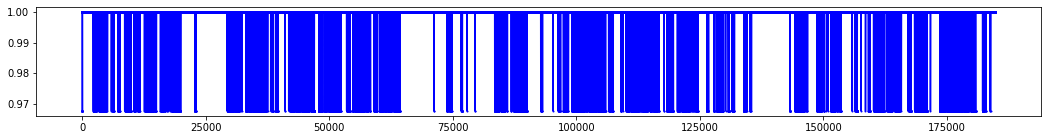

In [70]:
plt.figure(figsize=(18,2))
plt.plot(eec1_p['etm'], 'b-o', markersize=1)

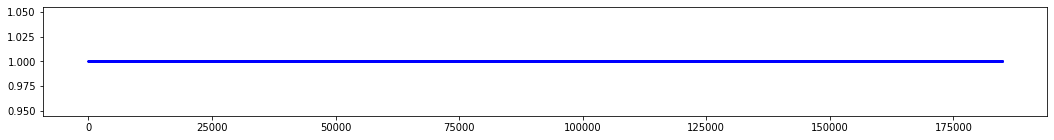

In [71]:
plt.figure(figsize=(18,2))
plt.plot(eec1_p['ddept'], 'b-o', markersize=1)

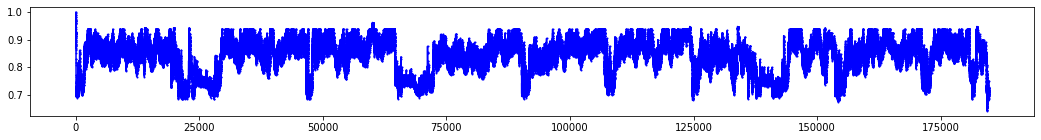

In [72]:
plt.figure(figsize=(18,2))
plt.plot(eec1_p['aept'], 'b-o', markersize=1)

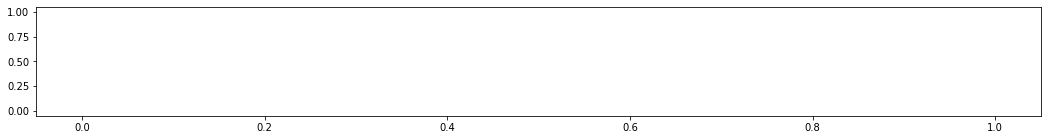

In [73]:
plt.figure(figsize=(18,2))
plt.plot(eec1_p['sacde'], 'b-o', markersize=1)

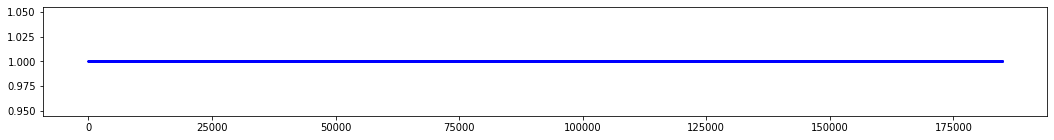

In [74]:
plt.figure(figsize=(18,2))
plt.plot(eec1_p['esm'], 'b-o', markersize=1)

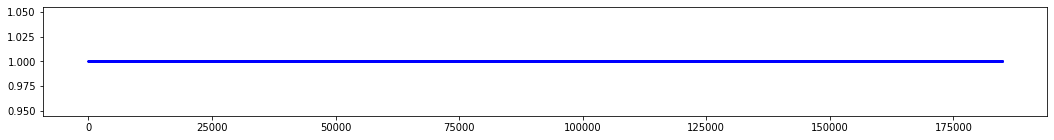

In [75]:
plt.figure(figsize=(18,2))
plt.plot(eec1_p['edpt'], 'b-o', markersize=1)

In [79]:
print(avg, std)

{'etm': 0.9991015030879067, 'ddept': 1.0, 'aept': 0.8361839732380828, 'sacde': nan, 'esm': 1.0, 'edpt': 1.0} {'etm': 0.005308166083170852, 'ddept': 0.0, 'aept': 0.05823446878598462, 'sacde': nan, 'esm': 0.0, 'edpt': 0.0}
